In [41]:
RANDOM_SEED=1

# import base packages into the namespace for this program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

import warnings
warnings.simplefilter(action='ignore')

# read data for the Boston Housing Study
# creating data frame restdata
train_filedata = pd.read_csv('train.csv')
train_filedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [42]:
train_filedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [43]:
test_filedata = pd.read_csv('test.csv')
test_filedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [44]:
test_filedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


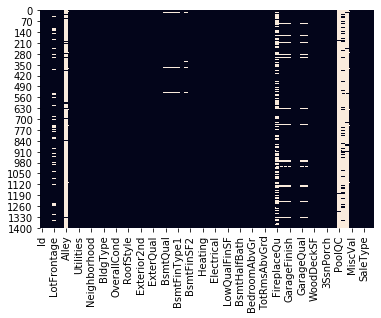

In [45]:
sns.heatmap(train_filedata.isnull(),cbar=False)

In [46]:
train_missing_data=train_filedata.isnull().sum()*100/len(train_filedata)
pd.set_option('display.max_rows',100)
train_missing_data

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

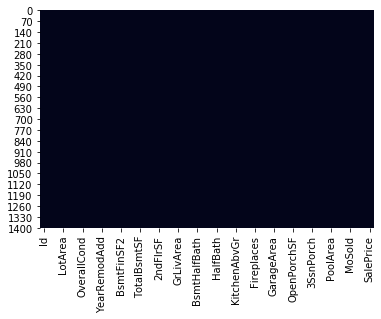

In [47]:
# x data and y data
delcolumns=['MSZoning','Street','Alley','LotShape','LandContour','Utilities',
                                        'LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
                                        'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
                                        'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
                                        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','GarageFinish',
                                        'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',                                        
                                        'KitchenQual','FireplaceQu', 'Functional','GarageType',
                                        'GarageQual','GarageCond','PavedDrive','PoolQC','Fence',
                                        'MiscFeature','SaleType','SaleCondition',
                                        'LotFrontage','GarageYrBlt','MasVnrArea'            
                                       ]
train_data=train_filedata.drop(columns=delcolumns)
sns.heatmap(train_data.isnull(),cbar=False)

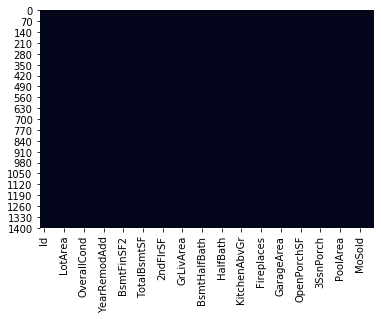

In [48]:
test_data=test_filedata.drop(columns=delcolumns)
sns.heatmap(test_data.isnull(),cbar=False)

In [49]:
train_data.fillna(0,inplace=True)
test_data.fillna(0,inplace=True)

In [50]:
m_data=train_data.isnull().sum()*100/len(train_data)
pd.set_option('display.max_rows',100)
m_data

Id               0.0
MSSubClass       0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SalePrice        0.0
dtype: float64

In [51]:
t_data=test_data.isnull().sum()*100/len(test_data)
pd.set_option('display.max_rows',100)
t_data

Id               0.0
MSSubClass       0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
dtype: float64

In [52]:
train_x=train_data.copy()
train_x.drop(columns=['SalePrice'], inplace=True)
train_y=train_data[['SalePrice']]


In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# split data using test_train_split
lin_x_train,lin_x_test,lin_y_train,lin_y_test=train_test_split(train_x,train_y,test_size=.3,random_state=10)

Number of features used: 32467.63834927114
Training set score: 0.7998099874068969
Testing set score: 0.8212184087166803


,Id,SalePrice
0,1461,116583.334130
1,1462,155011.824308
2,1463,174150.715972
3,1464,204935.361597
4,1465,201025.937938
5,1466,187289.057019
6,1467,206854.080202
7,1468,172667.873662
8,1469,207209.607100
9,1470,114238.600307


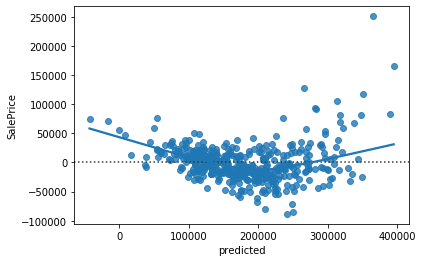

In [54]:

lin_test=test_data.copy()
lin_test_res=test_data[['Id']]


#Linear Regression
lin_reg=LinearRegression(fit_intercept=True).fit(lin_x_train,lin_y_train)

lin_score=lin_reg.score(lin_x_test,lin_y_test)

print('Number of features used:',np.sum(lin_reg.coef_))
print('Training set score:', lin_reg.score(lin_x_train,lin_y_train))
print('Testing set score:',lin_reg.score(lin_x_test,lin_y_test))

lin_y_test['predicted']=lin_reg.predict(lin_x_test)

sns.residplot(lin_y_test['predicted'],lin_y_test['SalePrice'],lowess=True)
lin_np=np.sqrt(mean_squared_error(lin_y_test['SalePrice'],lin_y_test['predicted']))

lin_test_res['SalePrice']=lin_reg.predict(lin_test)

pd.set_option('display.max_rows',1500)
lin_test_res


Number of features used: 34
Training set score: 0.7998080909475318
Test set score: 0.8213644336945559


,Id,SalePrice
0,1461,116806.835385
1,1462,154884.426126
2,1463,174287.874402
3,1464,205026.663449
4,1465,200982.767769
5,1466,187308.578119
6,1467,206831.034604
7,1468,172650.678042
8,1469,207264.829550
9,1470,114253.166815


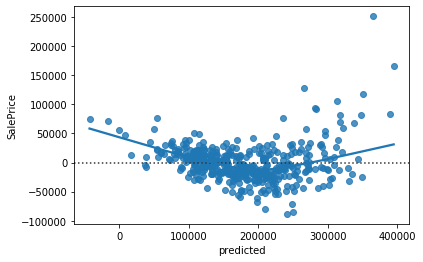

In [55]:
#ridge regression
ridge_test=test_data.copy()
ridge_test_res=test_data[['Id']]

from sklearn.linear_model import Ridge
ridge_train_x, ridge_test_x,ridge_train_y,ridge_test_y=train_test_split(train_x,train_y, test_size=.3,random_state=10)
ridge_model = Ridge(alpha=1, solver="cholesky",fit_intercept=True).fit(ridge_train_x,ridge_train_y)
print("Number of features used: {}".format(np.sum(ridge_model.coef_ !=0)))
print("Training set score:" ,ridge_model.score(ridge_train_x,ridge_train_y))
ridge_score=ridge_model.score(ridge_test_x,ridge_test_y)
print("Test set score:" ,ridge_score)
ridge_test_y['predicted']=ridge_model.predict(ridge_test_x)
sns.residplot(ridge_test_y['predicted'],ridge_test_y['SalePrice'],lowess=True)
ridge_np=np.sqrt(mean_squared_error(ridge_test_y['SalePrice'],ridge_test_y['predicted']))

ridge_test_res['SalePrice']=ridge_model.predict(ridge_test)

pd.set_option('display.max_rows',1500)
ridge_test_res


Number of features used: 34
Training set score: 0.7998099872237447
Test set score: 0.8212199535999591


,Id,SalePrice
0,1461,116806.835385
1,1462,154884.426126
2,1463,174287.874402
3,1464,205026.663449
4,1465,200982.767769
5,1466,187308.578119
6,1467,206831.034604
7,1468,172650.678042
8,1469,207264.829550
9,1470,114253.166815


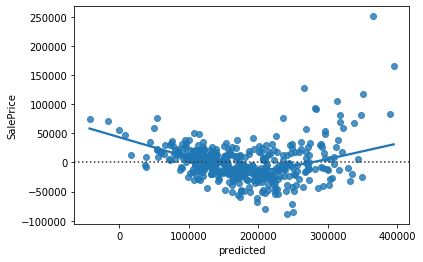

In [56]:
#lasso regression
lasso_test=test_data.copy()
lasso_test_res=test_data[['Id']]

from sklearn.linear_model import Lasso
lasso_train_x, lasso_test_x,lasso_train_y,lasso_test_y=train_test_split(train_x,train_y, test_size=.3,random_state=10)
lasso_model = Lasso(alpha=.1, max_iter = 10000,fit_intercept=True,tol=0.01).fit(lasso_train_x,lasso_train_y)
print("Number of features used: {}".format(np.sum(lasso_model.coef_ !=0)))
print("Training set score:" ,lasso_model.score(lasso_train_x,lasso_train_y))
lasso_score=lasso_model.score(lasso_test_x,lasso_test_y)
print("Test set score:" ,lasso_score)
lasso_test_y['predicted']=lasso_model.predict(lasso_test_x)
sns.residplot(lasso_test_y['predicted'],lasso_test_y['SalePrice'],lowess=True)
lasso_np=np.sqrt(mean_squared_error(lasso_test_y['SalePrice'],lasso_test_y['predicted']))

lasso_test_res['SalePrice']=lasso_model.predict(lasso_test)

pd.set_option('display.max_rows',1500)
lasso_test_res

Number of features used: 34
Training set score: 0.7986076391492195
Test set score: 0.8241569085875797


,Id,SalePrice
0,1461,116806.835385
1,1462,154884.426126
2,1463,174287.874402
3,1464,205026.663449
4,1465,200982.767769
5,1466,187308.578119
6,1467,206831.034604
7,1468,172650.678042
8,1469,207264.829550
9,1470,114253.166815


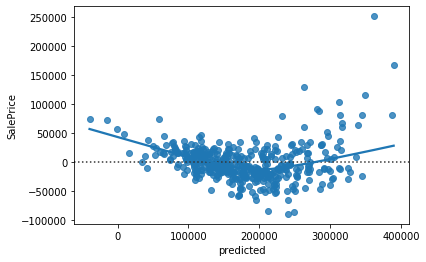

In [57]:
#elastic net

es_test=test_data.copy()
es_test_res=test_data[['Id']]

from sklearn.linear_model import ElasticNet
es_train_x, es_test_x,es_train_y,es_test_y=train_test_split(train_x,train_y, test_size=.3,random_state=10)
es_model = ElasticNet(random_state=1, alpha=0.1,fit_intercept=True,tol=0.01).fit(es_train_x,es_train_y)
print("Number of features used: {}".format(np.sum(es_model.coef_ !=0)))
print("Training set score:" ,es_model.score(es_train_x,es_train_y))
es_score=es_model.score(es_test_x,es_test_y)
print("Test set score:" ,es_score)
es_test_y['predicted']=es_model.predict(es_test_x)
sns.residplot(es_test_y['predicted'],es_test_y['SalePrice'],lowess=True)
es_np=np.sqrt(mean_squared_error(es_test_y['SalePrice'],es_test_y['predicted']))

es_test_res['SalePrice']=es_model.predict(es_test)

pd.set_option('display.max_rows',1500)
es_test_res

In [58]:

des_tree=test_data.copy()
des_tree_res=test_data[['Id']]

# split data using test_train_split
des_x_train,des_x_test,des_y_train,des_y_test=train_test_split(train_x,train_y,test_size=.3,random_state=10)

#Decision tree
from sklearn.tree import DecisionTreeRegressor  # machine learning tree

tree_model_maker = DecisionTreeRegressor(random_state = 9999, max_depth = 5)


# fit regression tree using model 1 training/test split
tree_model_fit = tree_model_maker.fit(des_x_train, des_y_train)


tree_score=tree_model_maker.score(des_x_test,des_y_test)

des_y_train['predicted'] = tree_model_fit.predict(des_x_train)
full_tree_train_result = round(np.power(des_y_train['SalePrice'].corr(des_y_train['predicted']),2),3)
print('\nFull Tree Proportion of Training Set Variance Accounted for: ',full_tree_train_result)

# compute the proportion of response variance for test data

des_y_test['predicted'] = tree_model_fit.predict(des_x_test)
full_tree_train_result = round(np.power(des_y_test['SalePrice'].corr(des_y_test['predicted']),2),3)
print('\nFull Tree Proportion of Training Set Variance Accounted for: ',full_tree_train_result)

tree_np=np.sqrt(mean_squared_error(des_y_test['SalePrice'],des_y_test['predicted']))


des_tree_res['SalePrice']=tree_model_maker.predict(des_tree)

pd.set_option('display.max_rows',1500)
des_tree_res



Full Tree Proportion of Training Set Variance Accounted for:  0.874

Full Tree Proportion of Training Set Variance Accounted for:  0.759


,Id,SalePrice
0,1461,123388.211268
1,1462,146096.218045
2,1463,179970.708609
3,1464,179970.708609
4,1465,208941.769231
5,1466,179970.708609
6,1467,146096.218045
7,1468,179970.708609
8,1469,188180.400000
9,1470,123388.211268


Training set score: 0.87
Test set score: 0.80


,Id,SalePrice
0,1461,125465.336197
1,1462,143020.214725
2,1463,165911.768720
3,1464,177947.248721
4,1465,230028.690377
5,1466,177305.295209
6,1467,150390.837955
7,1468,171165.938142
8,1469,185090.551262
9,1470,125061.189104


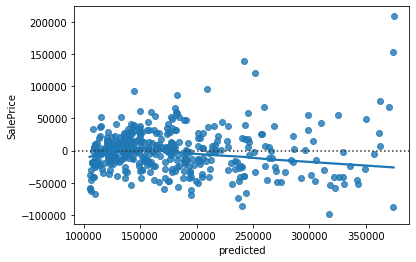

In [59]:
for_test=test_data.copy()
for_test_res=test_data[['Id']]

# split data using test_train_split
for_x_train,for_x_test,for_y_train,for_y_test=train_test_split(train_x,train_y,test_size=.3,random_state=10)


# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

RForest1 = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100)

RForest1.fit(for_x_train,for_y_train)

forest_score=RForest1.score(for_x_test,for_y_test)
#print("Number of features used: {}".format(np.sum(tree_model_fit.coef_ !=0)))
print("Training set score: {:.2f}".format(RForest1.score(for_x_train,for_y_train)))
print("Test set score: {:.2f}".format(RForest1.score(for_x_test,for_y_test)))

for_y_test['predicted']=RForest1.predict(for_x_test)

sns.residplot(for_y_test['predicted'],for_y_test['SalePrice'],lowess=True)

forest_np=np.sqrt(mean_squared_error(for_y_test['SalePrice'],for_y_test['predicted']))

for_test_res['SalePrice']=RForest1.predict(for_test)

pd.set_option('display.max_rows',1500)
for_test_res

#for_test_res.to_csv("random_test_data.csv",index=False)

In [60]:
grad_test=test_data.copy()
grad_test_res=test_data[['Id']]

# split data using test_train_split
grad_x_train,grad_x_test,grad_y_train,grad_y_test=train_test_split(train_x,train_y,test_size=.3,random_state=10)

from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(grad_x_train,grad_y_train)

errors = [mean_squared_error(grad_y_test, y_pred)
          for y_pred in gbrt.staged_predict(grad_x_test)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(grad_x_train,grad_y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=119,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Training set score: 0.95
Test set score: 0.87


,Id,SalePrice
0,1461,123313.991605
1,1462,163637.729720
2,1463,182061.397161
3,1464,186709.210044
4,1465,207860.592104
5,1466,172558.095191
6,1467,177321.554961
7,1468,158680.373139
8,1469,192568.335376
9,1470,130426.988300


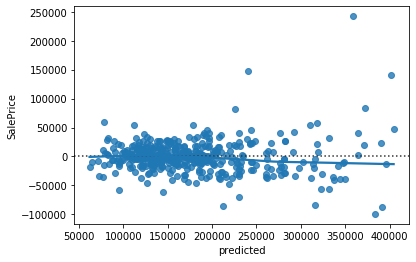

In [61]:
grad_score=gbrt_best.score(grad_x_test,grad_y_test)
print("Training set score: {:.2f}".format(gbrt_best.score(grad_x_train,grad_y_train)))
print("Test set score: {:.2f}".format(gbrt_best.score(grad_x_test,grad_y_test)))
#print("Number of features used: {}".format(np.sum(tree_model_fit.coef_ !=0)))


grad_y_test['predicted']= gbrt_best.predict(grad_x_test)
# Plot the residuals after fitting a linear model
sns.residplot(grad_y_test['predicted'], grad_y_test['SalePrice'], lowess=True)


grad_np=np.sqrt(mean_squared_error(for_y_test['SalePrice'],for_y_test['predicted']))

grad_test_res['SalePrice']=gbrt_best.predict(grad_test)

pd.set_option('display.max_rows',1500)
grad_test_res

#grad_test_res.to_csv("gradient_test_data.csv",index=False)

In [62]:
data={'Model':['Linear','Ridge','Lasso','ElasticNet','Decision Tree','RandomForest','GradientBoost'],
      'RMSE':[lin_np,ridge_np,lasso_np,es_np,tree_np,forest_np,grad_np],
      'Score':[round(lin_score*100,30),round(ridge_score*100,30),
               round(lasso_score*100,30),round(es_score*100,30),
               round(tree_score*100,30),
               round(forest_score*100,30),round(grad_score*100,30)
              ]
     }
result=pd.DataFrame(data,columns=['Model','RMSE','Score'])
result.sort_values(by='RMSE')      


,Model,RMSE,Score
3,ElasticNet,32096.151981,82.415691
1,Ridge,32349.999496,82.136443
2,Lasso,32363.079159,82.121995
0,Linear,32363.218988,82.121841
5,RandomForest,33919.522280,80.361024
6,GradientBoost,33919.522280,86.938792
4,Decision Tree,37717.551043,75.716776
